In [1]:
!pip install imbalanced-learn


Original class distribution:
 label
0    335847
2     55390
3     34134
1      2254
Name: count, dtype: int64


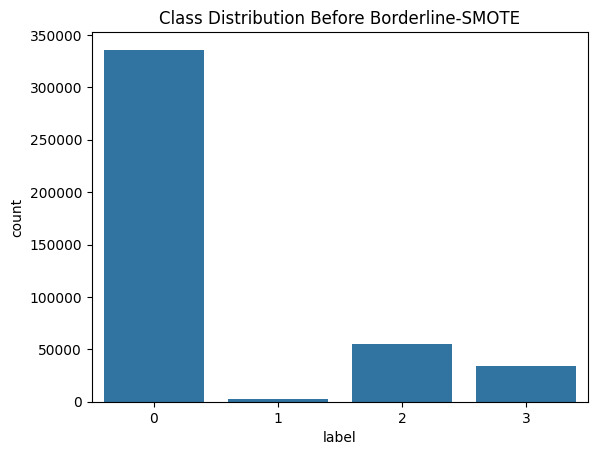

After Borderline-SMOTE:
 label
0    235092
2    235092
3    235092
1    235092
Name: count, dtype: int64


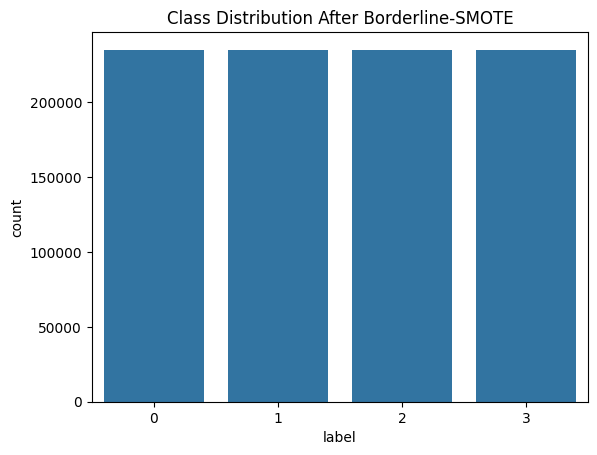

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    100755
           1       0.55      0.98      0.70       676
           2       0.99      0.99      0.99     16617
           3       0.50      0.90      0.64     10240

    accuracy                           0.92    128288
   macro avg       0.76      0.94      0.82    128288
weighted avg       0.95      0.92      0.93    128288



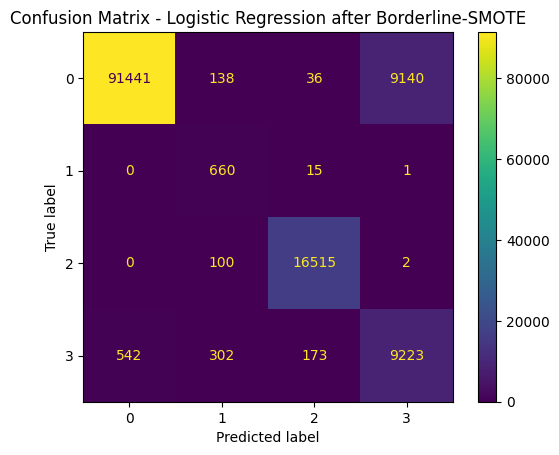

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from imblearn.over_sampling import BorderlineSMOTE

# Step 2: Load dataset
df = pd.read_csv("all_three (1).csv")
df = df.drop(columns=["Unnamed: 0"])

# Step 3: Basic class distribution
print("Original class distribution:\n", df['label'].value_counts())
sns.countplot(x=df['label'])
plt.title("Class Distribution Before Borderline-SMOTE")
plt.show()

# Step 4: Split and scale
X = df.drop("label", axis=1)
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# Step 5: Apply Borderline-SMOTE
bsmote = BorderlineSMOTE(kind='borderline-1', random_state=42)
X_resampled, y_resampled = bsmote.fit_resample(X_train, y_train)

# Step 6: Visualize new distribution
print("After Borderline-SMOTE:\n", pd.Series(y_resampled).value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Borderline-SMOTE")
plt.show()

# Step 7: Train a model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Step 8: Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Logistic Regression after Borderline-SMOTE")
plt.show()


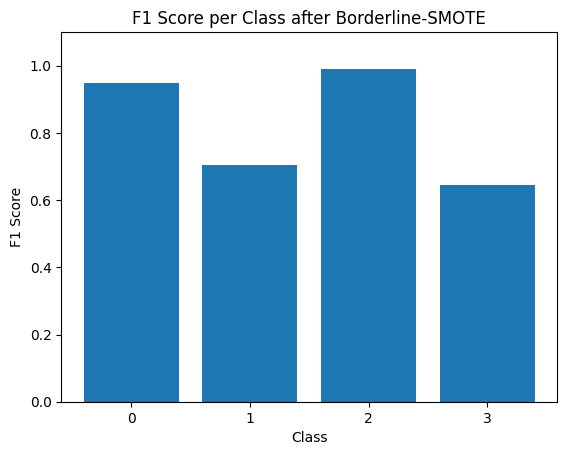

In [3]:
import matplotlib.pyplot as plt

report_dict = classification_report(y_test, y_pred, output_dict=True)
f1_scores = {k: v['f1-score'] for k, v in report_dict.items() if k.isdigit()}

plt.bar(f1_scores.keys(), f1_scores.values())
plt.title("F1 Score per Class after Borderline-SMOTE")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.show()


In [4]:
!pip install imbalanced-learn


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE


In [6]:
df = pd.read_csv("all_three (1).csv")
df = df.drop(columns=['Unnamed: 0'])  # if needed
X = df.drop("label", axis=1)
y = df["label"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
def apply_borderline_smote(split_ratio, random_state=42):
    test_size = 1 - split_ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=random_state
    )

    before_counts = y_train.value_counts().sort_index()

    bsmote = BorderlineSMOTE(kind='borderline-1', random_state=random_state)
    X_resampled, y_resampled = bsmote.fit_resample(X_train, y_train)

    after_counts = pd.Series(y_resampled).value_counts().sort_index()

    return before_counts.to_dict(), after_counts.to_dict()


In [8]:
split_60 = apply_borderline_smote(0.6)
split_70 = apply_borderline_smote(0.7)
split_80 = apply_borderline_smote(0.8)


In [11]:
# ✅ Required Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# ✅ Load Data
df = pd.read_csv("all_three (1).csv")

# ✅ Set target column
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# ✅ Define split ratios
split_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

# ✅ For each ratio
for train_ratio, test_ratio in split_ratios:
    print(f"\n🔷 Split Ratio {int(train_ratio*100)}:{int(test_ratio*100)}")

    # 1. Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42, stratify=y
    )

    # 2. Show original training class distribution
    original_counts = Counter(y_train)
    print("📊 Before Borderline-SMOTE (Train Set):", original_counts)

    # 3. Apply Borderline-SMOTE
    bsmote = BorderlineSMOTE(kind='borderline-1', random_state=42)
    X_resampled, y_resampled = bsmote.fit_resample(X_train, y_train)

    # 4. Show new class distribution
    resampled_counts = Counter(y_resampled)
    print("🧪 After Borderline-SMOTE:", resampled_counts)

    # 5. Analyze class growth
    for cls in sorted(resampled_counts):
        orig = original_counts[cls]
        new = resampled_counts[cls]
        added = new - orig
        print(f"Class {cls}: Original = {orig}, After SMOTE = {new} (+{added} samples)")



🔷 Split Ratio 60:40
📊 Before Borderline-SMOTE (Train Set): Counter({0: 201508, 2: 33234, 3: 20480, 1: 1353})
🧪 After Borderline-SMOTE: Counter({0: 201508, 2: 201508, 3: 201508, 1: 201508})
Class 0: Original = 201508, After SMOTE = 201508 (+0 samples)
Class 1: Original = 1353, After SMOTE = 201508 (+200155 samples)
Class 2: Original = 33234, After SMOTE = 201508 (+168274 samples)
Class 3: Original = 20480, After SMOTE = 201508 (+181028 samples)

🔷 Split Ratio 70:30
📊 Before Borderline-SMOTE (Train Set): Counter({0: 235092, 2: 38773, 3: 23894, 1: 1578})
🧪 After Borderline-SMOTE: Counter({0: 235092, 2: 235092, 3: 235092, 1: 235092})
Class 0: Original = 235092, After SMOTE = 235092 (+0 samples)
Class 1: Original = 1578, After SMOTE = 235092 (+233514 samples)
Class 2: Original = 38773, After SMOTE = 235092 (+196319 samples)
Class 3: Original = 23894, After SMOTE = 235092 (+211198 samples)

🔷 Split Ratio 80:20
📊 Before Borderline-SMOTE (Train Set): Counter({0: 268678, 2: 44312, 3: 27307, 1:

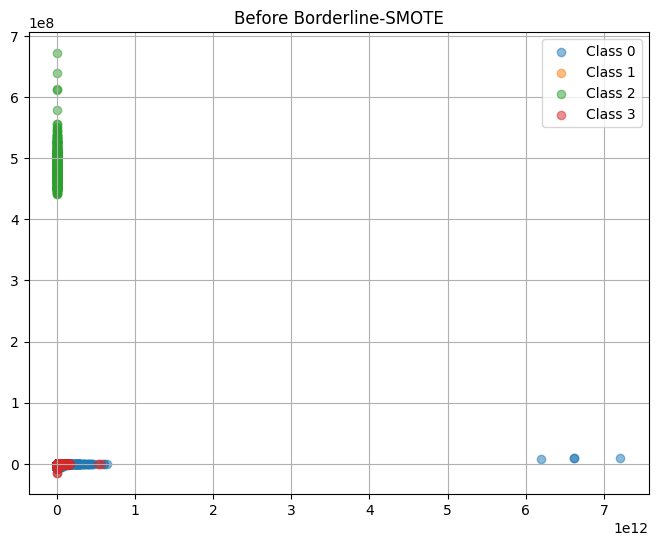

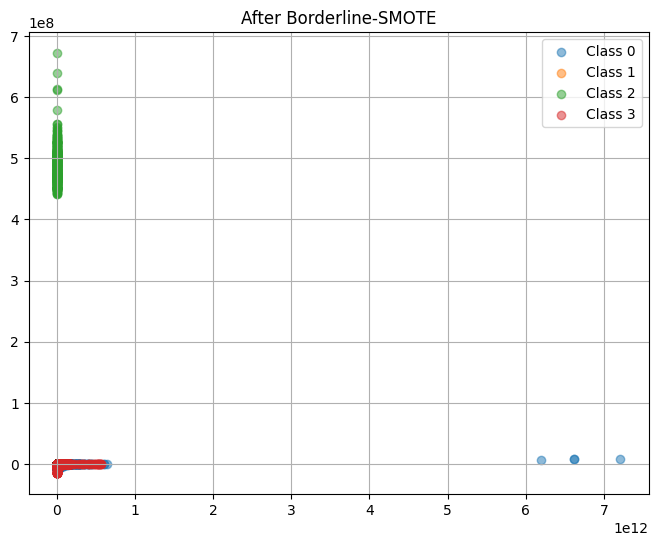

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    for label in sorted(set(y)):
        plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}", alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Before
plot_pca(X_train.values, y_train.values, "Before Borderline-SMOTE")

# After
plot_pca(X_resampled, y_resampled, "After Borderline-SMOTE")


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train on original
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Before SMOTE:\n", classification_report(y_test, clf.predict(X_test)))

# Train on resampled
clf.fit(X_resampled, y_resampled)
print("After SMOTE:\n", classification_report(y_test, clf.predict(X_test)))


Before SMOTE:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     67169
           1       0.98      0.98      0.98       451
           2       1.00      1.00      1.00     11078
           3       0.92      0.89      0.90      6827

    accuracy                           0.98     85525
   macro avg       0.97      0.97      0.97     85525
weighted avg       0.98      0.98      0.98     85525

After SMOTE:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     67169
           1       0.98      1.00      0.99       451
           2       1.00      1.00      1.00     11078
           3       0.89      0.90      0.90      6827

    accuracy                           0.98     85525
   macro avg       0.97      0.97      0.97     85525
weighted avg       0.98      0.98      0.98     85525

